In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from phe import pickle, query

In [2]:
date = 'date'
ltla = 'ltla'
nation = 'nation'

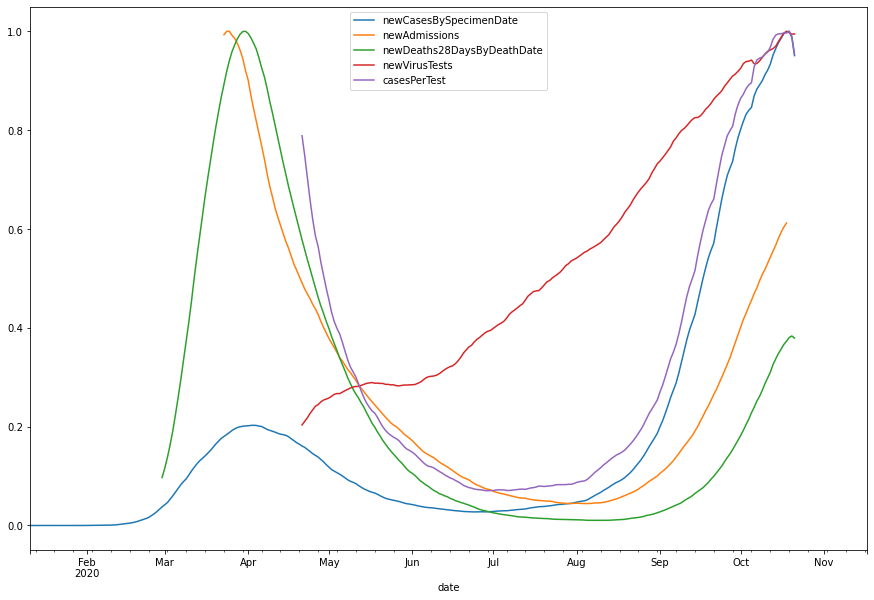

In [6]:
data = query(
    filters={area_type: overview},
    structure=[date, new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date, new_virus_tests]
)
data = data.set_index(pd.to_datetime(data[date])).rolling(28).mean()
data['casesPerTest'] = data[new_cases_by_specimen_date]/data[new_virus_tests]
data = data / data.max()
data.plot(figsize=(15, 10))

In [4]:
data.idxmax()


newCasesBySpecimenDate       2020-10-19
newAdmissions                2020-03-24
newDeaths28DaysByDeathDate   2020-03-31
newVirusTests                2020-10-18
casesPerTest                 2020-10-19
dtype: datetime64[ns]